## Tasca S4 T02

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exercici 2

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub **PRE-PROCESSING-DATA** amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

In [2]:
#Nombre columnas
column_names = ['Movie_id','Movie', 'Genre']

In [3]:
df = pd.read_csv("Dataset/Movies.csv", sep='::', engine = 'python', index_col = None, header = None, names = column_names)

In [4]:
df.head()

,Movie_id,Movie,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#Veamos los tipos de las características
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_id  3883 non-null   int64 
 1   Movie     3883 non-null   object
 2   Genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


Extraemos el año:

In [6]:
df[['Movie', 'Year']] = df['Movie'].str.rsplit(pat='(', n=1, expand=True)
df.head(5)

,Movie_id,Movie,Genre,Year
0,1,Toy Story,Animation|Children's|Comedy,1995)
1,2,Jumanji,Adventure|Children's|Fantasy,1995)
2,3,Grumpier Old Men,Comedy|Romance,1995)
3,4,Waiting to Exhale,Comedy|Drama,1995)
4,5,Father of the Bride Part II,Comedy,1995)


In [7]:
df['Year'] = df['Year'].str.replace(")"," ", regex=True)
df['Year'] = df['Year'].astype(int)
df.head()

,Movie_id,Movie,Genre,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_id  3883 non-null   int64 
 1   Movie     3883 non-null   object
 2   Genre     3883 non-null   object
 3   Year      3883 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 106.3+ KB


En este escenario vamos a aplicar el método de codificación ***One Hot Encoding*** a las características categóricas del dataset movies. Para ello utilizaremos la función *get_dummies* de la libreria pandas.

In [9]:
genres = df.Genre.str.get_dummies(sep='|').add_prefix('Genre_')
movies = pd.concat([df,genres], axis=1)

#eliminamos los datos originales no deseados
movies = movies.drop(['Genre'], axis=1)

In [10]:
movies.head(5)

,Movie_id,Movie,Year,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story,1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

* **Figura 1:** En esta primera representación veremos el volumen de películas producidas según su género cinematográfico. Los datos se han decido presentar en un diagrama de árbol o treemap y en un gráfico de barras.

In [11]:
import squarify

['Action' 'Adventure' 'Animation' "Children's" 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']


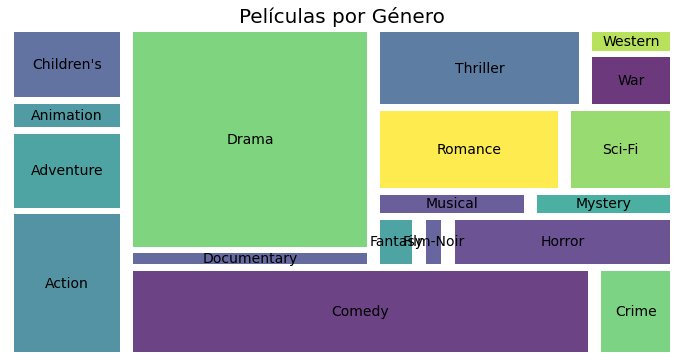

In [12]:
# Preparar los datos
data1 = movies.filter(like='Genre_').sum()

#Etiquetas
movies_genre = df['Genre']
todos_generos = []

for x in movies_genre:
    todos_generos.extend(x.split('|'))

generos = pd.unique(todos_generos)

generos.sort()
print(generos)

#Gráfico Treemap + Títulos

plt.figure(figsize=(12, 6))
plt.axis('off')
axis = squarify.plot(sizes=data1, label=generos, alpha=.8, pad=1, text_kwargs={'fontsize': 14})

axis.set_title("Películas por Género", fontsize=20)

plt.show()

<AxesSubplot:title={'center':'Número de películas por Género'}>

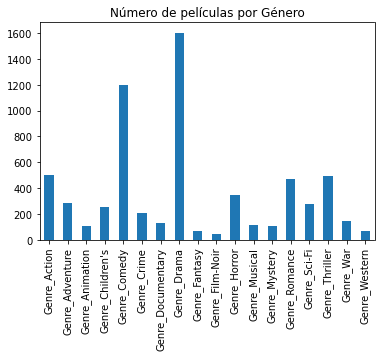

In [13]:
#Gráfico barras
data1.plot(kind='bar', title = 'Número de películas por Género')

* **Figura 2:** La segunda representación corresponde la correlación, si existe, entre los diferentes géneros.

<AxesSubplot:>

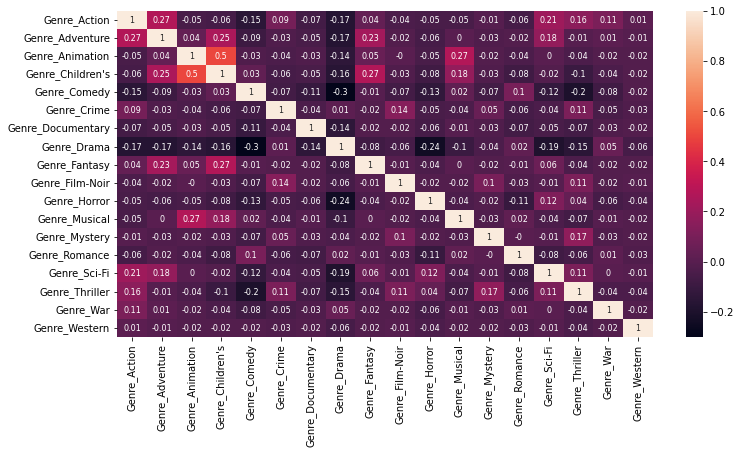

In [14]:
## Create a dataset
data2 = movies.filter(like='Genre_')

# Calculate correlation between each pair of variable
corr_matrix=data2.corr().round(2)

# plot it
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8})

Por los resultados se aprecia una alta relación entre los géneros ***Children's*** y ***Animation***.

* **Figura 3:** Por último veremos la evolución del número de películas producidas por años.

In [22]:
df['Year'] = df['Year']

,Movie_id,Movie,Year,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story,1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:title={'center':'Nº de películas por año'}, xlabel='Year'>

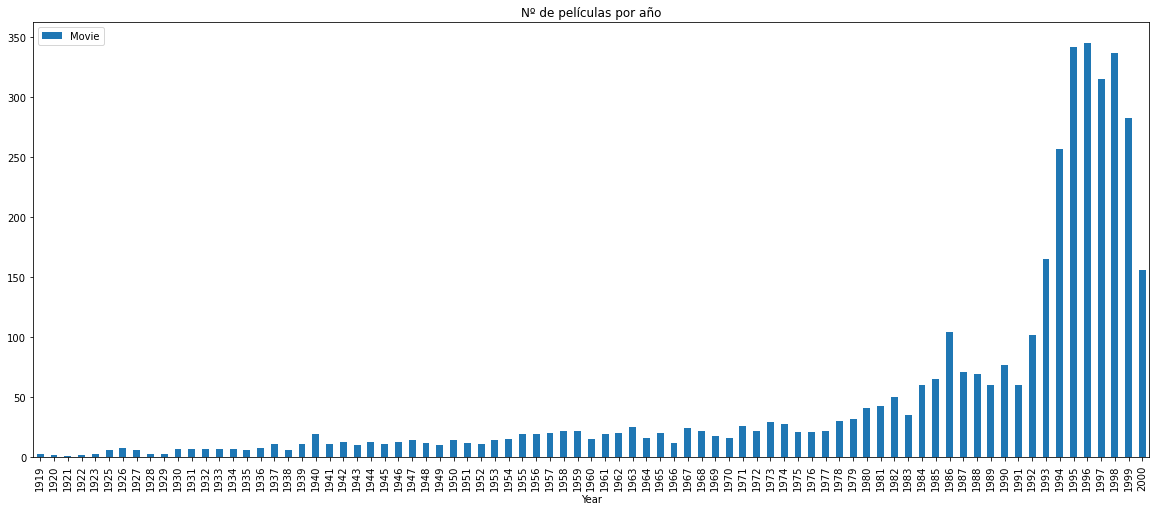

In [15]:
# Preparar los datos
data3 = movies.groupby('Year').agg({'Movie':'count'})

#Gráfico de barras + Títulos
data3.plot(kind='bar', figsize=(20,8), title = 'Nº de películas por año')